### 🖥️회귀 프로젝트 2: 인터넷 속도 회귀 예측

#### 📚 Features

- Ping_latency: 핑(지연도)
- Download_speed: 다운로드 속도
- Upload_speed: 업로드 속도
- Packet_loss_rate: 손실된 데이터 패킷의 비율
- Router_distance: 라우터와 사용자 기기 사이의 물리적 거리
- Network_congestion: 네트워크 혼잡도 수준
- ISP_quality: ISP(Internet Service Provider, 인터넷 서비스 제공업체)가 제공하는 서비스 품질
- Connection_type_DSL, Connection_type_Cable, Connection_type_Fiber: 인터넷 연결 유형에 대한 이진 지표
- Signal_strength: 사용자 기기에서 수신하는 무선 신호의 세기
- Weather_conditions: 인터넷 성능에 영향을 줄 수 있는 환경 요

#### 🎈 Target

- Internet_speed: 인터넷 속도

---

#### 📌 목차

1. 데이터 탐색 및 전처리
2. 선형 회귀 분석
3. OLS, VIF 확인
4. L1, L2를 통한 규제 적용 여부 판단
5. 요약

#### 1. 데이터 탐색 및 전처리

In [1]:
import pandas as pd

i_df = pd.read_csv('./datasets/internet_speed.csv', low_memory=False)
i_df

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.000000,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.000000,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.000000,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.000000,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.000000,2.693502,80.535702,4.190802,2612.315499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.382879,86.477319,33.242407,1.754077,3.947383,4.809102,6.040825,0.000000,3.112226,2.456354,92.054785,0.720499,2600.889238
4996,10.372146,90.263339,10.534320,0.093628,7.542697,3.991297,6.245036,0.000000,0.000000,0.000000,97.745403,1.598590,2769.740618
4997,19.752928,94.937252,4.459498,0.607397,9.309467,1.077823,6.707668,0.011109,3.744975,1.019031,97.209409,2.218448,3031.079831
4998,41.708542,42.761359,34.782156,0.886640,6.735571,2.604019,9.772978,0.000000,0.000000,3.915730,96.801547,2.196325,818.064550


- 데이터의 정보를 확인해봅니다.

In [2]:
i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ping_latency           5000 non-null   float64
 1   Download_speed         5000 non-null   float64
 2   Upload_speed           5000 non-null   float64
 3   Packet_loss_rate       5000 non-null   float64
 4   Router_distance        5000 non-null   float64
 5   Network_congestion     5000 non-null   float64
 6   ISP_quality            5000 non-null   float64
 7   Connection_type_DSL    5000 non-null   float64
 8   Connection_type_Cable  5000 non-null   float64
 9   Connection_type_Fiber  5000 non-null   float64
 10  Signal_strength        5000 non-null   float64
 11  Weather_conditions     5000 non-null   float64
 12  Internet_speed         5000 non-null   float64
dtypes: float64(13)
memory usage: 507.9 KB


- 결측치가 없음을 확인할 수 있습니다.
- 중복행을 확인해봅니다.

In [3]:
i_df.duplicated().sum()

0

- 중복행 또한 없음을 확인할 수 있습니다.
- 데이터의 분포를 히스토그램으로 확인해봅니다.

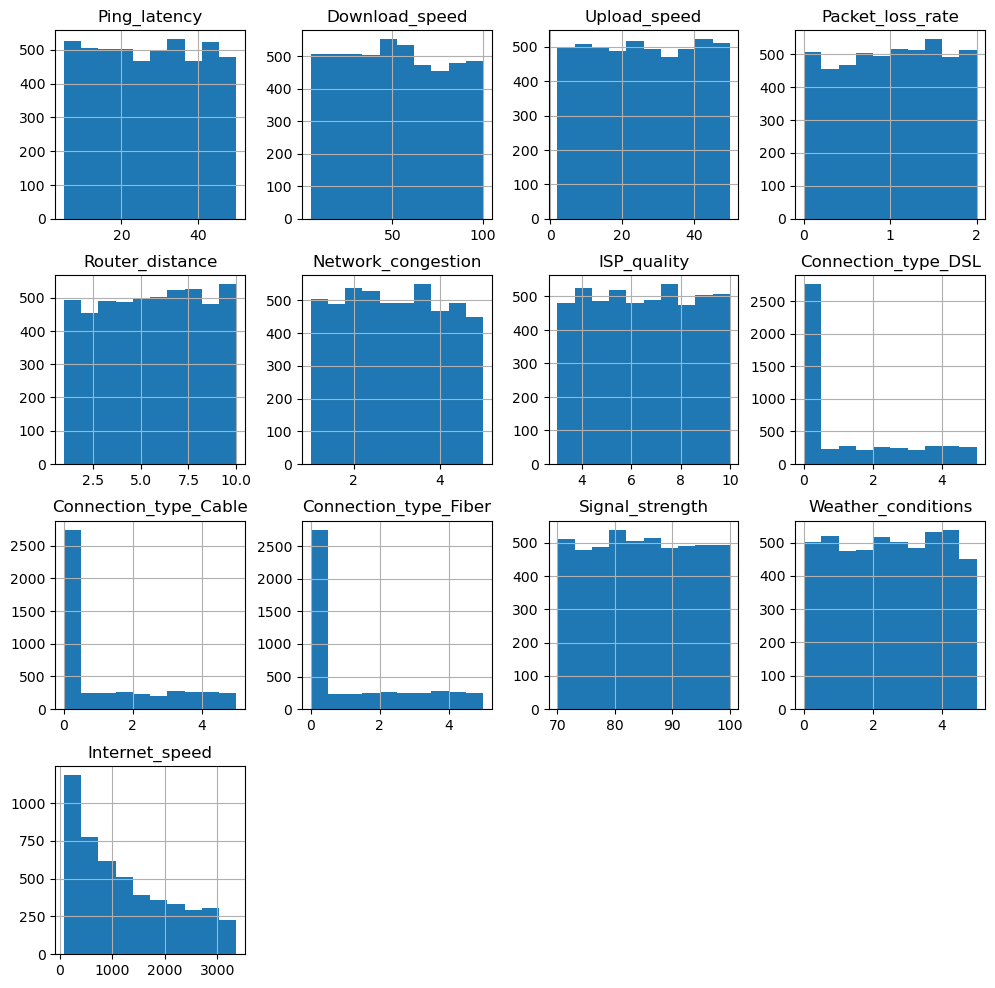

In [4]:
import matplotlib.pyplot as plt

i_df.hist(figsize=(12, 12))
plt.show()

- 대부분 feature의 분포가 정규분포의 양상을 띠기보다는 전체적으로 고르게 분포되어 있음을 알 수 있습니다.
- 특이할 만한 점은 Connection_type과 관련된 feature들의 분포가 0에 집중되어 나타난다는 점과,  
  데이터셋을 제공한 측의 설명과는 달리 **정수형의 이진 지표가 아닌 실수형으로 되어 있다**는 점입니다.
- 인터넷 연결 유형에서 각 feature가 나타내는 DSL, Cable, Fiber는 서로 상호 배타적이며 순서가 없으므로,  
  일반적으로 0과 1의 이진형으로 원-핫 인코딩을 진행했을 것으로 생각했으나 info()에서 dtype이 float64였으며 히스토그램의 분포로 보았을 때에도 연속형이었습니다.
- 따라서 현재 범주형으로 되어있지 않으므로, 추후에 삭제할 가능성을 열어두고 우선은 남겨둡니다.
- 다음으로는 상관관계를 확인해봅니다.

In [5]:
corr = i_df.corr()
corr

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
Ping_latency,1.000000,-0.007017,-0.009517,0.028672,-0.011310,-0.017431,-0.015415,-0.009626,0.015357,0.011046,-0.003596,-0.031202,-0.000861
Download_speed,-0.007017,1.000000,-0.022831,-0.000423,0.009986,-0.007908,-0.018289,0.028122,0.001483,-0.010740,0.001845,0.008815,0.975699
Upload_speed,-0.009517,-0.022831,1.000000,0.007119,-0.027433,0.023695,-0.014841,0.026959,-0.012848,0.000412,-0.044703,0.000877,-0.004202
Packet_loss_rate,0.028672,-0.000423,0.007119,1.000000,0.010196,-0.020278,-0.022456,0.014866,0.004882,-0.032766,0.017904,0.021842,-0.001732
Router_distance,-0.011310,0.009986,-0.027433,0.010196,1.000000,-0.010684,-0.016746,0.005220,0.004775,0.001081,0.004280,0.012505,0.010041
Network_congestion,-0.017431,-0.007908,0.023695,-0.020278,-0.010684,1.000000,0.025701,0.011865,0.000529,0.025461,0.039788,0.000598,0.000018
ISP_quality,-0.015415,-0.018289,-0.014841,-0.022456,-0.016746,0.025701,1.000000,-0.025370,0.003804,-0.009783,-0.000594,0.008871,-0.015351
Connection_type_DSL,-0.009626,0.028122,0.026959,0.014866,0.005220,0.011865,-0.025370,1.000000,0.009952,0.004400,0.005887,0.015861,0.020906
Connection_type_Cable,0.015357,0.001483,-0.012848,0.004882,0.004775,0.000529,0.003804,0.009952,1.000000,0.007921,0.019018,-0.005282,0.007339
Connection_type_Fiber,0.011046,-0.010740,0.000412,-0.032766,0.001081,0.025461,-0.009783,0.004400,0.007921,1.000000,0.019631,0.016793,0.000194


- 상관관계를 seaborn의 heatmap을 통해 시각화합니다.

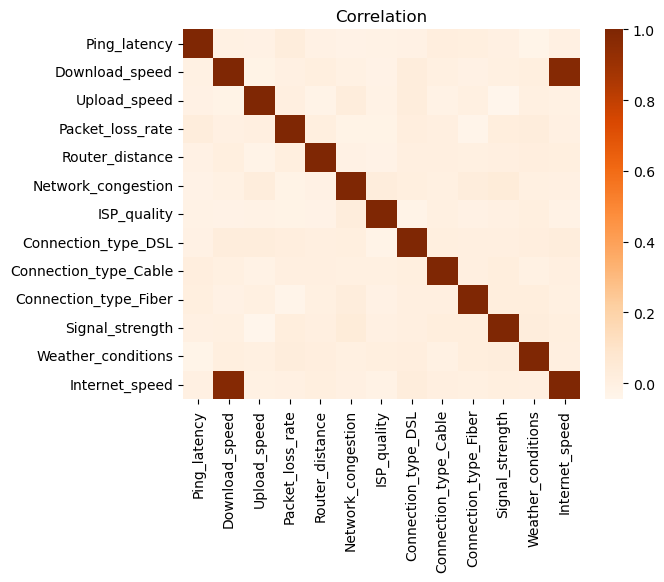

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_heatmap = sns.heatmap(corr, cmap="Oranges")
corr_heatmap.set_title('Correlation')
plt.show()

- 상관관계를 시각화해본 결과, **독립변수 사이의 상관관계는 매우 약하게 나타났습니다**.
- 종속변수와의 상관관계를 내림차순으로 출력하여 수치로 확인해봅니다.

In [7]:
corr['Internet_speed'].sort_values(ascending=False)[1:]

Download_speed           0.975699
Connection_type_DSL      0.020906
Signal_strength          0.011692
Router_distance          0.010041
Weather_conditions       0.008200
Connection_type_Cable    0.007339
Connection_type_Fiber    0.000194
Network_congestion       0.000018
Ping_latency            -0.000861
Packet_loss_rate        -0.001732
Upload_speed            -0.004202
ISP_quality             -0.015351
Name: Internet_speed, dtype: float64

- 'Download_speed' feature가 종속변수와의 상관관계가 매우 높게 나타났으며 나머지 독립변수들은 상관관계가 약했습니다.

- 앞서 종속변수의 분포가 왼쪽으로 치우쳐 나타났으므로, 회귀 예측에 앞서 np.log1p 스케일링을 적용하기로 합니다.

In [8]:
import numpy as np

pre_i_df = i_df.copy()
pre_i_df.Internet_speed = np.log1p(pre_i_df.Internet_speed)
pre_i_df

,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.000000,0.000000,76.190258,2.552049,6.594873
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.000000,3.869607,70.945684,2.788454,6.902892
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.000000,2.332773,83.994324,3.098587,7.844972
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.000000,1.608198,92.278904,4.479742,6.433481
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.000000,2.693502,80.535702,4.190802,7.868375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.382879,86.477319,33.242407,1.754077,3.947383,4.809102,6.040825,0.000000,3.112226,2.456354,92.054785,0.720499,7.863993
4996,10.372146,90.263339,10.534320,0.093628,7.542697,3.991297,6.245036,0.000000,0.000000,0.000000,97.745403,1.598590,7.926870
4997,19.752928,94.937252,4.459498,0.607397,9.309467,1.077823,6.707668,0.011109,3.744975,1.019031,97.209409,2.218448,8.017004
4998,41.708542,42.761359,34.782156,0.886640,6.735571,2.604019,9.772978,0.000000,0.000000,3.915730,96.801547,2.196325,6.708163


<Axes: >

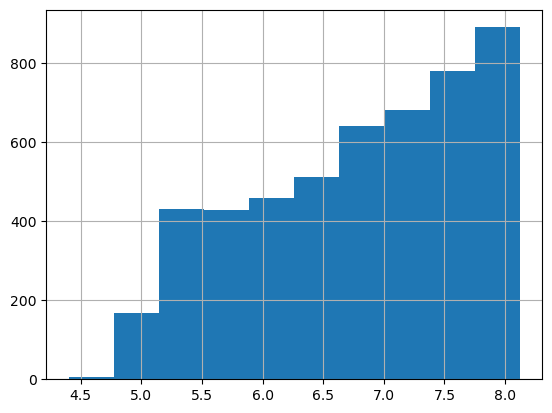

In [9]:
pre_i_df.Internet_speed.hist()

#### 2. 선형 회귀 분석
- 기초적인 전처리 수행 후 먼저 선형 회귀 분석을 진행합니다.
- 이상치 제거 및 독립변수의 분포 조정 등은 회귀 분석 결과 평가 지표 점수가 너무 낮을 경우 진행합니다.

In [10]:
# Loss 평가 함수 정의
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = i_df.iloc[:, :-1], i_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0207, RMSE: 0.1438, MSLE: 0.0004, RMSLE: 0.0200, R2: 0.9754
